In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24082 entries, 0 to 24081
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          24082 non-null  int64 
 1   year        24082 non-null  int64 
 2   week        24082 non-null  int64 
 3   start.date  24082 non-null  object
 4   end.date    24082 non-null  object
 5   district    24082 non-null  object
 6   cases       24082 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.3+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          73 non-null     float64
 1   year        73 non-null     float64
 2   week        73 non-null     float64
 3   start.date  73 non-null     object 
 4   end.date    73 non-null     object 
 5   district    73 non-null     object 
dtypes: float64(3), object(3)
memory usage: 11.4+ KB


In [5]:
train_data["start.date"] = pd.to_datetime(train_data["start.date"])
train_data["end.date"] = pd.to_datetime(train_data["end.date"])

In [6]:
train_data.describe()

,ID,year,week,start.date,end.date,cases
count,24082.000000,24082.000000,24082.000000,24082,24082,24082.000000
mean,12041.500000,2015.362844,26.380741,2015-11-03 21:18:36.684660736,2015-11-09 21:18:36.684660736,31.210780
min,1.000000,2006.000000,1.000000,2006-12-23 00:00:00,2006-12-29 00:00:00,0.000000
25%,6021.250000,2011.000000,13.000000,2011-05-28 00:00:00,2011-06-03 00:00:00,2.000000
50%,12041.500000,2015.000000,26.000000,2015-11-07 00:00:00,2015-11-13 00:00:00,8.000000
75%,18061.750000,2020.000000,39.000000,2020-04-11 00:00:00,2020-04-17 00:00:00,28.000000
max,24082.000000,2024.000000,53.000000,2024-09-21 00:00:00,2024-09-27 00:00:00,2631.000000
std,6952.018927,5.126867,15.015737,NaN,NaN,81.781986


In [7]:
train_data.head()

,ID,year,week,start.date,end.date,district,cases
0,1,2006,52,2006-12-23,2006-12-29,Colombo,71
1,2,2006,52,2006-12-23,2006-12-29,Gampaha,12
2,3,2006,52,2006-12-23,2006-12-29,Kalutara,12
3,4,2006,52,2006-12-23,2006-12-29,Kandy,20
4,5,2006,52,2006-12-23,2006-12-29,Matale,4


In [8]:
train_data_by_district = train_data.groupby('district').agg({'cases': ['sum', 'mean', 'count']})

In [9]:
display(train_data_by_district)

cases                  
                 sum        mean count
district                              
Ampara          3848    4.146552   928
Anuradhapura   11147   12.011853   928
Badulla        15686   16.903017   928
Batticaloa     31352   33.784483   928
Colombo       160674  173.140086   928
Galle          28611   30.830819   928
Gampaha        93378  100.622845   928
Hambanthota    15156   16.331897   928
Jaffna         43308   46.668103   928
Kalmune        15679   17.597082   891
Kalutara       45779   49.330819   928
Kandy          61423   66.188578   928
Kegalle        33153   35.725216   928
Kilinochchi     2795    3.011853   928
Kurunegala     40045   43.151940   928
Mannar          4390    4.730603   928
Matale         16045   17.289871   928
Matara         24493   26.393319   928
Monaragala      9544   10.284483   928
Mullaitivu      1829    1.970905   928
NuwaraEliya     4702    5.116431   919
Polonnaruwa     5950    6.411638   928
Puttalam       24830   26.756466   928
Ratnapura      34766   37.463362   928
Trincomalee    17452   18.806034   928
Vavuniya        5583    6.016164   928

# Plotting

In [10]:
train_data_sorted = train_data.sort_values('start.date')

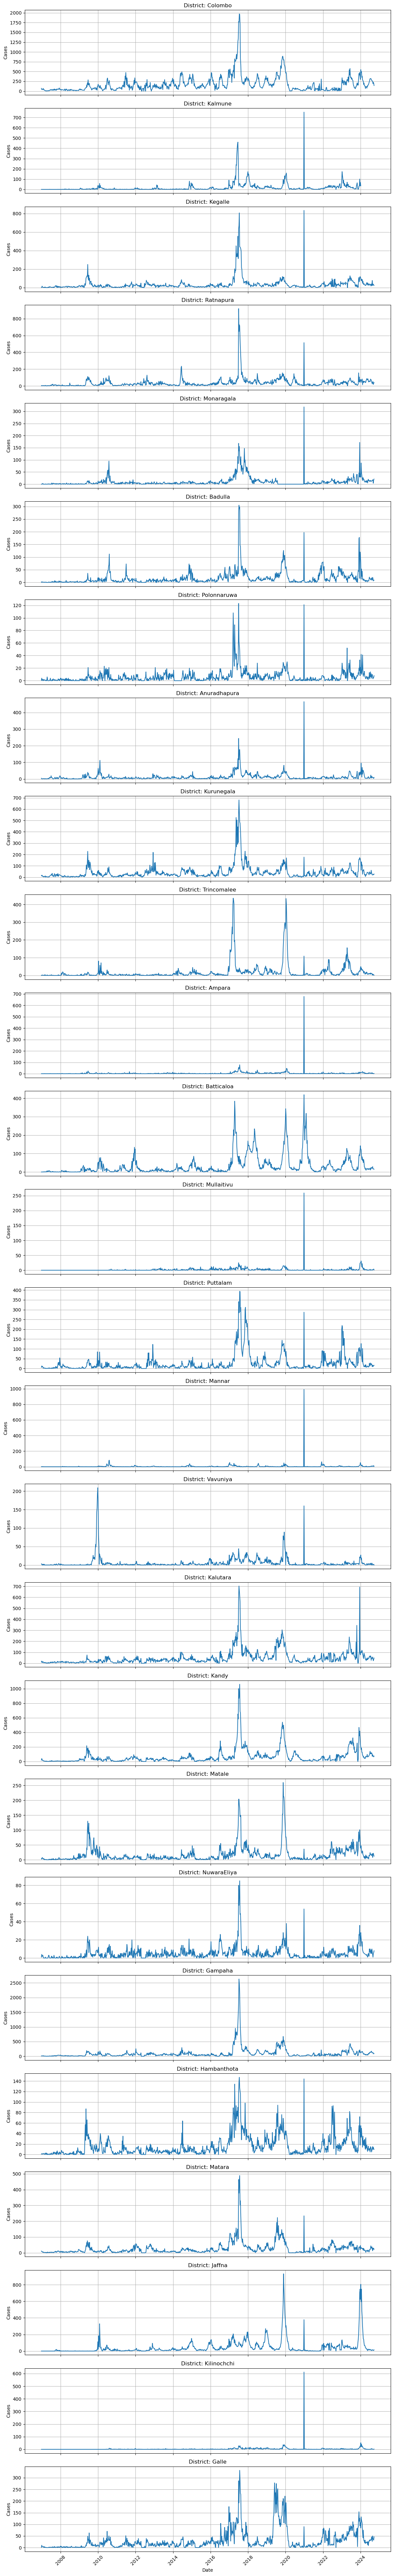

In [19]:
# Get unique districts
districts = train_data_sorted['district'].unique()
num_districts = len(districts)

# Create subplots
fig, axes = plt.subplots(nrows=num_districts, ncols=1, figsize=(12, 3 * num_districts), sharex=True)

# If there's only one district, axes won't be an array, so handle separately
if num_districts == 1:
    axes = [axes]

# Plot each district separately
for ax, district in zip(axes, districts):
    district_data = train_data_sorted[train_data_sorted['district'] == district]
    ax.plot(district_data['start.date'], district_data['cases'], linestyle='-')
    ax.set_title(f"District: {district}")
    ax.set_ylabel("Cases")
    ax.grid(True)

# Set x-axis label
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming train_data is already loaded
train_data['cases_last_week'] = train_data.groupby('district')['cases'].shift(1)
train_data.dropna(inplace=True)

# Initialize dictionary to store forecasts
future_predictions = {}

# Loop through each district to train a separate model and forecast
for district in train_data['district'].unique():
    district_data = train_data[train_data['district'] == district]

    # Train-test split
    X = district_data[['week', 'cases_last_week']]
    y = district_data['cases']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Forecast for the next 3 weeks
    last_week = max(district_data['week'])
    last_cases = district_data.iloc[-1]['cases']

    district_forecast = []
    for i in range(1, 4):
        future_week = last_week + i
        future_input = pd.DataFrame({'week': [future_week], 'cases_last_week': [last_cases]})
        
        predicted_cases = model.predict(future_input)[0]
        district_forecast.append(predicted_cases)
        
        # Update last_cases for the next prediction step
        last_cases = predicted_cases

    # Store the forecast
    future_predictions[district] = district_forecast

# Print results
for district, predictions in future_predictions.items():
    print(f"{district}: Week {last_week+1} → {predictions[0]:.2f}, Week {last_week+2} → {predictions[1]:.2f}, Week {last_week+3} → {predictions[2]:.2f}")

Colombo: Week 54 → 203.56, Week 55 → 268.13, Week 56 → 309.63
Gampaha: Week 54 → 143.66, Week 55 → 181.79, Week 56 → 166.29
Kalutara: Week 54 → 64.55, Week 55 → 95.73, Week 56 → 120.41
Kandy: Week 54 → 79.00, Week 55 → 76.01, Week 56 → 78.82
Matale: Week 54 → 27.07, Week 55 → 27.56, Week 56 → 27.46
NuwaraEliya: Week 54 → 7.30, Week 55 → 7.01, Week 56 → 7.01
Galle: Week 54 → 69.78, Week 55 → 74.56, Week 56 → 105.57
Hambanthota: Week 54 → 10.89, Week 55 → 13.81, Week 56 → 12.57
Matara: Week 54 → 24.20, Week 55 → 18.08, Week 56 → 21.55
Jaffna: Week 54 → 62.26, Week 55 → 105.16, Week 56 → 105.50
Kilinochchi: Week 54 → 3.68, Week 55 → 3.59, Week 56 → 3.59
Mannar: Week 54 → 5.58, Week 55 → 12.63, Week 56 → 26.60
Vavuniya: Week 54 → 0.22, Week 55 → 0.22, Week 56 → 0.22
Mullaitivu: Week 54 → 1.62, Week 55 → 1.67, Week 56 → 1.67
Batticaloa: Week 54 → 26.02, Week 55 → 29.26, Week 56 → 34.15
Ampara: Week 54 → 1.23, Week 55 → 1.60, Week 56 → 1.23
Trincomalee: Week 54 → 2.67, Week 55 → 3.54, Week 5